# Playstyle column 

In [1]:
#Import dependencies
import pandas as pd
import os
import numpy as np
import scipy.stats as stats
import re
from matplotlib import pyplot as plt

In [2]:
#Import csv where we cleaned NAs
## 11682 rows 
cleaned_df = pd.read_csv("cleaned_data_js_sc_rg.csv", encoding = "ISO-8859-1")

cleaned_df.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1,23,5,USA,USA
1,2,42052.00680,Somewhat difficult,Other,PC,8,I play for fun,having fun,Unranked,2,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8,16,33,USA,USA
2,3,42052.03860,Not difficult at all,Other,PC,0,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8,17,31,DEU,DEU
3,4,42052.06804,Not difficult at all,Other,PC,20,I play for fun,improving,Unranked,5,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0,17,11,USA,USA
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,I play for fun,having fun,Unranked,1,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14,14,13,KOR,USA


In [3]:
# cleaned_df = cleaned_df.dropna()
# cleaned_df

## drop 11542

In [4]:
#11598 rows 
countries_df=cleaned_df[cleaned_df["Residence_ISO3"].notna()]
countries_df

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1,23,5,USA,USA
1,2,42052.00680,Somewhat difficult,Other,PC,8,I play for fun,having fun,Unranked,2,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8,16,33,USA,USA
2,3,42052.03860,Not difficult at all,Other,PC,0,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8,17,31,DEU,DEU
3,4,42052.06804,Not difficult at all,Other,PC,20,I play for fun,improving,Unranked,5,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0,17,11,USA,USA
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,I play for fun,having fun,Unranked,1,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14,14,13,KOR,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11677,14246,42057.75678,Not difficult at all,Other,"Console (PS, Xbox, ...)",40,I play for fun,improving,Unranked,10,...,Master (or equivalent),France,France,Multiplayer,Accept,4,28,7,FRA,FRA
11678,14247,42057.81185,Extremely difficult,League of Legends,PC,20,I play for fun,winning,Unranked,20,...,High school diploma (or equivalent),USA,USA,Multiplayer,Accept,20,23,25,USA,USA
11679,14248,42058.16964,Not difficult at all,Starcraft 2,PC,20,I play for fun,having fun,Ranked - Gold,14,...,High school diploma (or equivalent),Norway,Norway,Multiplayer,Accept,0,32,10,NOR,NOR
11680,14249,42058.24420,Somewhat difficult,Other,"Console (PS, Xbox, ...)",5,I play for fun,having fun,Unranked,0,...,High school diploma (or equivalent),Canada,Canada,Singleplayer,Accept,13,16,32,CAN,CAN


In [5]:
list_all = countries_df.columns
list_all

Index(['S. No.', 'Timestamp', 'GADE', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
       'Degree', 'Birthplace', 'Residence', 'Playstyle', 'accept', 'GAD_T',
       'SWL_T', 'SPIN_T', 'Residence_ISO3', 'Birthplace_ISO3'],
      dtype='object')

In [6]:
# countries_df2 = pd.DataFrame(countries_df, columns = ['GADE', 'Game', 'Platform', 'earnings', 'whyplay', 'League', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
#        'Degree','Residence', 'Playstyle',])
# print(countries_df)

Is there a relationship between mental health disorder prevalence and different demographics?
- Degree |  hours
- GAD_T | SWL_T | SPIN_T
- Narcissism
- gender | age
- Work | earnings
- whyplay | playstyle
- League | Game
- Platform | streams

#### Generalised Anxiety Disorder - GAD

In [7]:
GAD_mean = round(countries_df['GAD_T'].astype('float').mean(), 2)
GAD_median = round(countries_df['GAD_T'].astype('float').median(), 2)
GAD_mode = round(countries_df['GAD_T'].astype('float').mode(), 2)

print(f"GAD Rate Mean: {GAD_mean}")
print(f"GAD Rate Median {GAD_median}")
print(f"GAD Rate mode {GAD_mode}")

GAD Rate Mean: 5.44
GAD Rate Median 4.0
GAD Rate mode 0    2.0
dtype: float64


## gender 

In [8]:
gender = countries_df.groupby(['S. No.', 'Gender'])
gender_df= pd.DataFrame(gender.size())

count_gender = pd.DataFrame(gender_df.groupby(['Gender']).count())
count_gender.columns = ['Total Count']
count_gender

,Total Count
Gender,
Female,650
Male,10910
Other,38


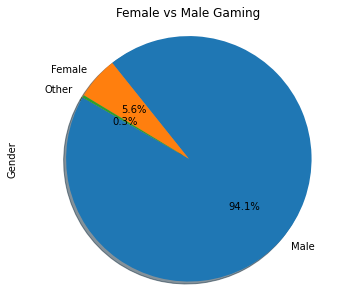

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_gender = countries_df['Gender'].value_counts()

fig1, ax1 = plt.subplots(figsize=(6,5))
pie = count_gender.plot.pie(figsize=(6,5), shadow=True, autopct='%1.1f%%', startangle=150)
plt.title('Female vs Male Gaming')
plt.ylabel('Gender')

plt.axis('equal')
# plt.savefig("Male_vs_Females.png")
plt.show()

In [10]:
#  def gender_to_numeric(x):
#         if x=='Other': return 3
#         if x=='Female': return 2
#         if x=='Male':   return 1

#     countries_df['gender_num'] = countries_df['gender'].apply(gender_to_numeric)
#     print(countries_df)

In [11]:
countries_df['GADE'].unique()

array(['Not difficult at all', 'Somewhat difficult', 'Very difficult',
       'Extremely difficult'], dtype=object)

In [12]:
countries_df['Gender'].value_counts()

Male      10910
Female      650
Other        38
Name: Gender, dtype: int64

In [13]:
import math

def gender_code(gender_string):
    if isinstance(gender_string, float) and math.isnan(gender_string):
        return gender_string
    return int(gender_string == "Female")

In [14]:
countries_df["Gender"] = countries_df["Gender"].apply(gender_code)
countries_df["Gender"].value_counts(dropna=False)


C:\Users\dtuca\AppData\Local\Temp/ipykernel_8608/327252740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df["Gender"] = countries_df["Gender"].apply(gender_code)


0    10948
1      650
Name: Gender, dtype: int64

In [15]:
countries_df['earnings'].value_counts()


I play for fun                                                                               10441
I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)      852
I earn a living by playing this game                                                            40
I play to win                                                                                    3
i try                                                                                            2
                                                                                             ...  
I've had tournament winnings in past                                                             1
i live to play                                                                                   1
I play for fun but i want to earn some money with it, when i become pro.                         1
i play for fund and dor killing some time                                                        1
I play but

In [16]:
forfun = countries_df[countries_df['earnings'] == 'I play for fun']
fun_n_earn = countries_df[countries_df['earnings'] == 'I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)']

print(forfun['Gender'].mean())
print(fun_n_earn['Gender'].mean())

0.05842352265108706
0.03286384976525822


In [17]:
countries_df = pd.DataFrame(countries_df)
# countries_df['Game'] =countries_df['Game'].astype('category').cat.codes
# countries_df['Platform'] =countries_df['Platform'].astype('category').cat.codes
countries_df['earnings'] =countries_df['earnings'].astype('category').cat.codes
# countries_df['Hours'] =countries_df['Hours'].astype('category').cat.codes
# countries_df['whyplay'] =countries_df['whyplay'].astype('category').cat.codes
# countries_df['League'] =countries_df['earnings'].astype('category').cat.codes
# countries_df['streams'] =countries_df['streams'].astype('category').cat.codes
countries_df['Narcissism'] =countries_df['Narcissism'].astype('category').cat.codes
countries_df['Gender'] =countries_df['Gender'].astype('category').cat.codes
countries_df['Age'] =countries_df['Age'].astype('category').cat.codes
countries_df['Work'] =countries_df['Work'].astype('category').cat.codes
countries_df['Degree'] =countries_df['Degree'].astype('category').cat.codes
countries_df['Residence'] =countries_df['Residence'].astype('category').cat.codes
# countries_df['Playstyle'] =countries_df['Playstyle'].astype('category').cat.codes

In [18]:
countries_df[countries_df.columns[1:]].corr()['GAD_T'][:]
countries_df[countries_df.columns[1:]].corr()['SWL_T'][:]
countries_df[countries_df.columns[1:]].corr()['SPIN_T'][:]

Timestamp    -0.019381
Hours         0.099206
earnings     -0.005828
streams       0.075551
Narcissism   -0.013403
Gender        0.146244
Age          -0.109384
Work          0.119245
Degree        0.062509
Residence     0.009067
GAD_T         0.444061
SWL_T        -0.312108
SPIN_T        1.000000
Name: SPIN_T, dtype: float64

In [19]:
countries_df['GADE'].unique()

array(['Not difficult at all', 'Somewhat difficult', 'Very difficult',
       'Extremely difficult'], dtype=object)

In [20]:
countries_df['Gender'].value_counts()

0    10948
1      650
Name: Gender, dtype: int64

In [21]:
# Your data should be a pandas dataframe for this example
countries_df = pd.DataFrame(countries_df)
corr_matrix = countries_df.corr()
print(corr_matrix["GAD_T"].sort_values(ascending=False))

GAD_T         1.000000
SPIN_T        0.444061
Gender        0.122027
Hours         0.105949
Work          0.097039
streams       0.079848
Narcissism    0.069146
earnings      0.041550
Residence     0.033025
Degree        0.023736
S. No.       -0.004876
Timestamp    -0.015193
Age          -0.038211
SWL_T        -0.393193
Name: GAD_T, dtype: float64


array([[<AxesSubplot:xlabel='GAD_T', ylabel='GAD_T'>,
        <AxesSubplot:xlabel='Hours', ylabel='GAD_T'>],
       [<AxesSubplot:xlabel='GAD_T', ylabel='Hours'>,
        <AxesSubplot:xlabel='Hours', ylabel='Hours'>]], dtype=object)

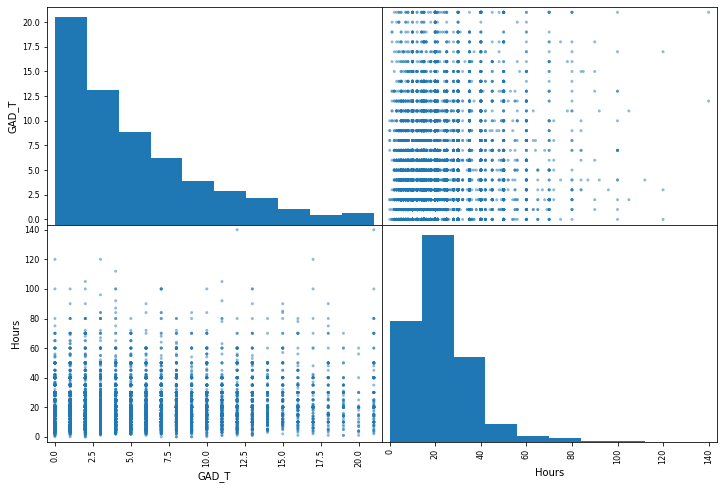

In [22]:
# make sure to specify some features that you might want to focus on or the plots might be too big
# from pandas.tools.plotting import scatter_matrix

from pandas.plotting import scatter_matrix
attributes = ['GAD_T', 'Hours']
scatter_matrix(countries_df[attributes], figsize=(12, 8))
# plt.savefig(‘matrix.png’)

# AGE

In [25]:
# create new data_age group by
data_age = countries_df.copy()
countries_df.loc[data_age['Age']<=18, 'age_group'] = 'teenage'
countries_df.loc[data_age['Age'].between(20,24), 'age_group'] = 'y_adult 20-24'
countries_df.loc[data_age['Age'].between(25,39), 'age_group'] = 'adult 25-39'
countries_df.loc[data_age['Age'].between(40,56), 'age_group'] = 'older_adult'
data_age.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,age_group
0,1,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15,56,having fun,Unranked,0,...,USA,102,Singleplayer,Accept,1,23,5,USA,USA,teenage
1,2,42052.00680,Somewhat difficult,Other,PC,8,56,having fun,Unranked,2,...,USA,102,Multiplayer,Accept,8,16,33,USA,USA,y_adult 20-24
2,3,42052.03860,Not difficult at all,Other,PC,0,56,having fun,Unranked,0,...,Germany,34,Singleplayer,Accept,8,17,31,DEU,DEU,teenage
3,4,42052.06804,Not difficult at all,Other,PC,20,56,improving,Unranked,5,...,USA,102,Multiplayer,Accept,0,17,11,USA,USA,teenage
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,56,having fun,Unranked,1,...,USA,89,Multiplayer,Accept,14,14,13,KOR,USA,teenage


In [26]:
# numeric_columns = ["GAD_T", "SWL_T", "SPIN_T"]
age_df = data_age.groupby(['age_group']).agg({'GAD_T': ['count', 'mean', 'sum']})
age_df

GAD_T                 
               count      mean    sum
age_group                            
adult 25-39        4  0.250000      1
teenage        11568  5.446145  63001
y_adult 20-24     22  5.227273    115